In [1]:
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable
import prettytable
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import math

In [2]:
a=load_boston()
x=a.data
y=a.target
x=StandardScaler().fit_transform(x)


## Sklearn SGD implementation

In [3]:
lr=SGDRegressor()
lr.fit(x,y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [4]:
mse_sklearn=mean_squared_error(y,lr.predict(x))
mse_sklearn

22.741680590825236

In [5]:
lr.coef_

array([-0.6172394 ,  0.55071579, -0.44571707,  0.83244945, -0.99143772,
        3.09740386, -0.19855041, -2.28908276,  0.86142294, -0.51841993,
       -1.80006985,  0.93561104, -3.43862106])

Text(0, 0.5, 'predicted values')

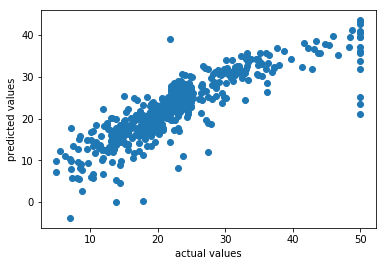

In [6]:
plt.scatter(y,lr.predict(x))
plt.xlabel('actual values')
plt.ylabel('predicted values')

## Our own SGD implementation

In [7]:
def step_gradient(w,b,x,y,lr,alpha=0.0001):
    wgrads=np.zeros_like(w)
    bgrad=0
    for i in range((len(x))):
        wgrads+=-(2/len(x))*((y[i]-np.dot(w,x[i])-b)*x[i]+(alpha*(2*w)))#gradient with respect to weights
        bgrad+=-(2/len(x))*((y[i]-np.dot(w,x[i])-b))#gradient with respect to  intercept 
    
    w=w-lr*wgrads
    b=b-lr*bgrad

    return w,b 
        
        

In [8]:
def gradient_descent(x,y,eta0=0.01):
    fl=x.shape[1]
    w=np.random.normal(0,1,size=(fl,),)
    b=np.random.random()
    best_loss=mean_squared_error(y,np.dot(x,w)+b)
    loss_improved=True
    iteration=0
    lr=eta0
    while loss_improved:
        iteration=iteration+1
        w,b=step_gradient(w,b,x,y,lr)
        if iteration%5==0:#if loss is not much decreasing after 5 iterations we will terminate
            curr_loss=mean_squared_error(y,np.dot(x,w)+b)
            if (best_loss-curr_loss)>0.001:
                best_loss=curr_loss
            else:
                loss_improved=False
        lr=eta0/math.pow(iteration,0.25)#gradually decreasing learning rate
    return w,b

w,b=gradient_descent(x,y)

Text(0, 0.5, 'predicted values')

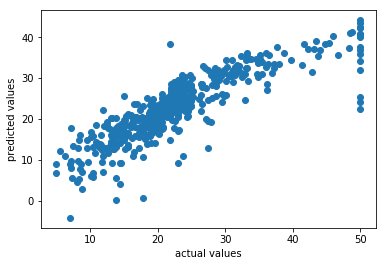

In [9]:
plt.scatter(y,np.dot(x,w)+b)
plt.xlabel('actual values')
plt.ylabel('predicted values')

In [10]:
mse_ours=mean_squared_error(y,np.dot(x,w)+b)
mse_ours

22.13081245773643

## Distribution of predictions

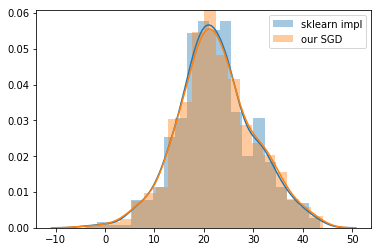

In [11]:
sns.distplot(lr.predict(x),label='sklearn impl')
sns.distplot(np.dot(x,w)+b,label='our SGD')
plt.legend()

## Conclusions

In [12]:
w=np.round(w,3)
sklearn_weights=np.array(lr.coef_)
sklearn_weights=np.round(sklearn_weights,3)
our_weights=list(w)
our_weights.insert(0,mse_ours)
our_weights.insert(0,'Our SGD')
sklearn_weights=list(sklearn_weights)
sklearn_weights.insert(0,mse_sklearn)
sklearn_weights.insert(0,'Sklearn')

x=PrettyTable()
x.hrules=prettytable.ALL
x.left_padding_width=0
x.right_padding_width=0
x.field_names=['SGD','MSE','w1','w2','w3','w4','w5','w6','w7','w8','w9','w10','w11','w12','w13']
x.add_row(our_weights)
x.add_row(sklearn_weights)
print(x)


+-------+------------------+------+-----+------+-----+------+-----+------+------+-----+------+------+-----+------+
|  SGD  |       MSE        |  w1  |  w2 |  w3  |  w4 |  w5  |  w6 |  w7  |  w8  |  w9 | w10  | w11  | w12 | w13  |
+-------+------------------+------+-----+------+-----+------+-----+------+------+-----+------+------+-----+------+
|Our SGD|22.13081245773643 |-0.776|0.768| -0.0 |0.714|-1.451|2.956|-0.081|-2.453|1.894|-1.459|-1.965|0.895|-3.606|
+-------+------------------+------+-----+------+-----+------+-----+------+------+-----+------+------+-----+------+
|Sklearn|22.741680590825236|-0.617|0.551|-0.446|0.832|-0.991|3.097|-0.199|-2.289|0.861|-0.518| -1.8 |0.936|-3.439|
+-------+------------------+------+-----+------+-----+------+-----+------+------+-----+------+------+-----+------+
